In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
import pickle as pkl
import seaborn as sns
import os
import statsmodels.api as sm
from scipy import stats

from lik_models import *
from helper_funcs import *
from plotting_funcs import *
from mcmc_data import *

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
mcmc = mcmc_data(count_matrix_fn='data/pancreas_beta_development_e_14_5.raw_count_matrix.tsv',
                          pkl_dir='outputs_full/pancreas_beta_development_e_14_5/',
                          tfs_fn='data/mouse_transcription_factors_zhou_et_al.txt',
                          name='e14.5 Pancreas Beta Development')

#load in all pkls
mcmc.load_pkls(sub_tfs=False)

#get best fitting genes
mcmc.get_top_genes(n_top=50,sub_tf=False)

Loading Count Matrix...
Normalizing Count Matrix...
Loading pkls...
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500


In [3]:
len(mcmc.dic_dict)

12554

In [4]:
gene = 'Neurog3'

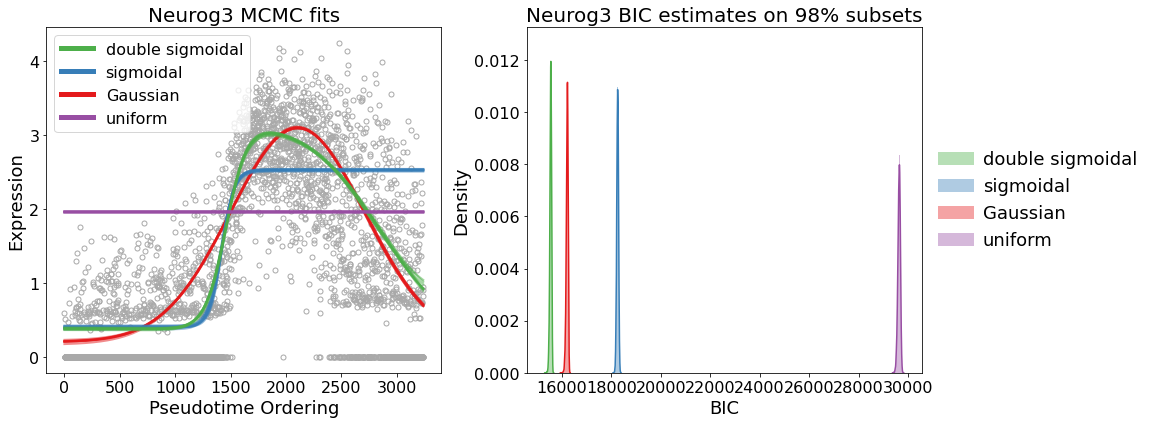

In [5]:
fig = make_joint_fit_and_bic_estimate_plot(mcmc,gene)

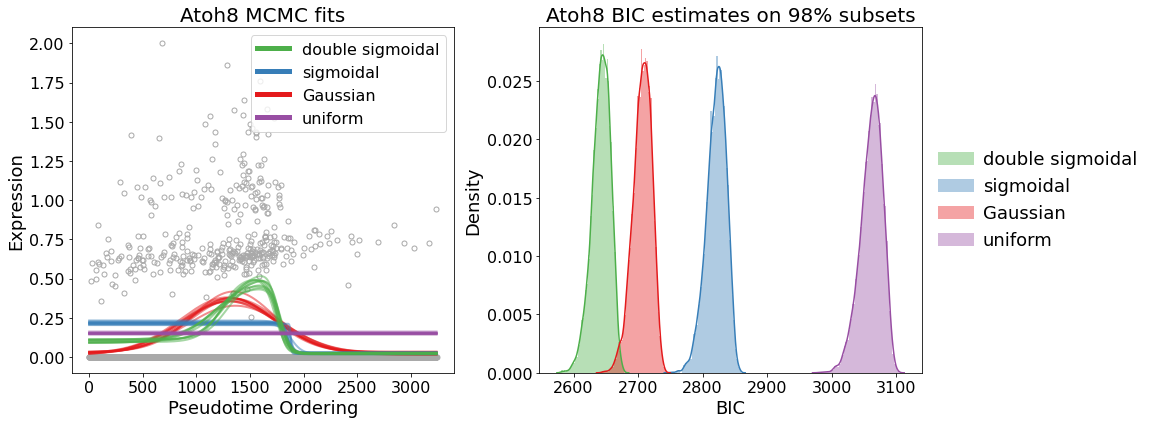

In [6]:
fig = make_joint_fit_and_bic_estimate_plot(mcmc,'Atoh8')

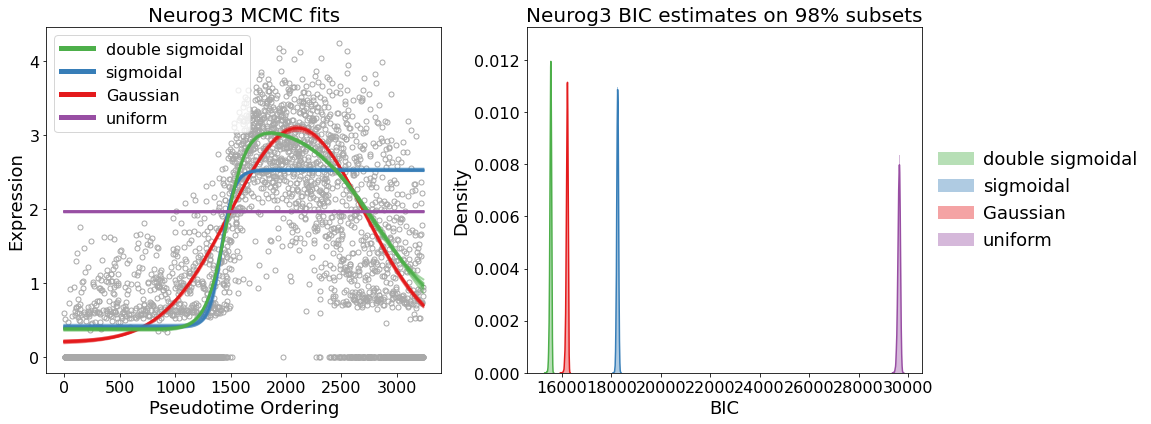

In [7]:
fig = make_joint_fit_and_bic_estimate_plot(mcmc,'Neurog3')

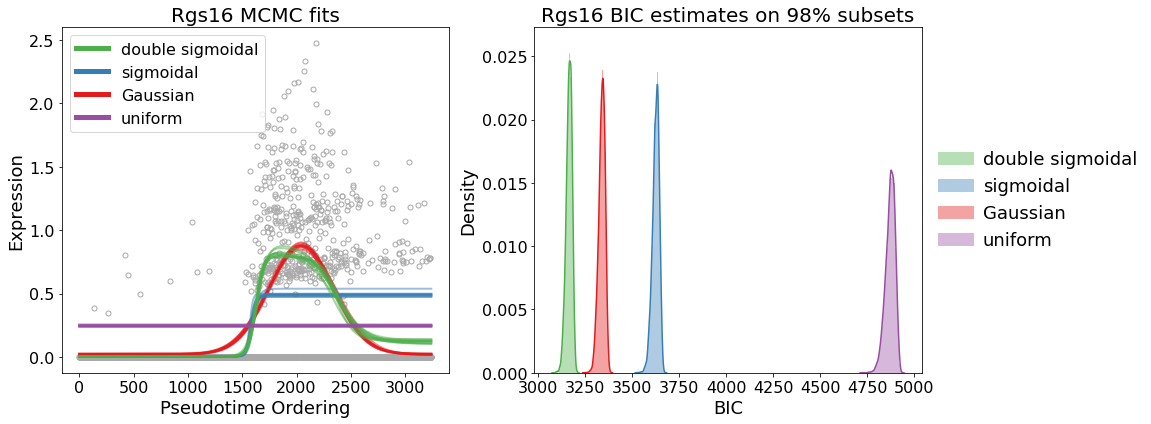

In [8]:
fig = make_joint_fit_and_bic_estimate_plot(mcmc,'Rgs16')

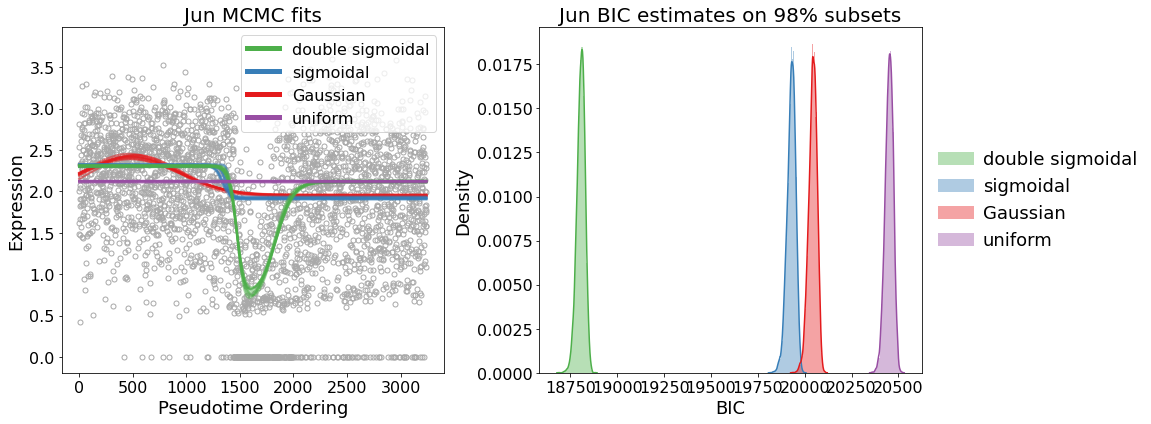

In [9]:
fig = make_joint_fit_and_bic_estimate_plot(mcmc,'Jun')

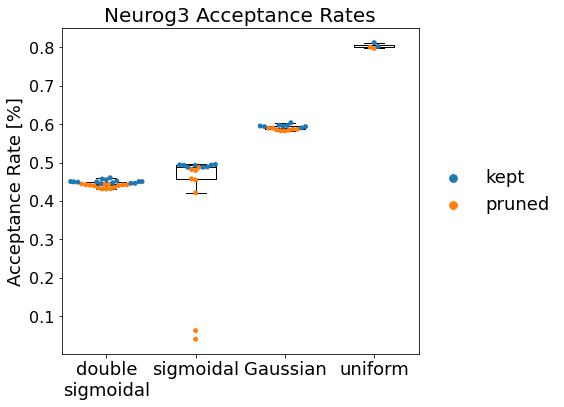

In [10]:
fig = make_acceptance_fraction_plot(mcmc,gene)

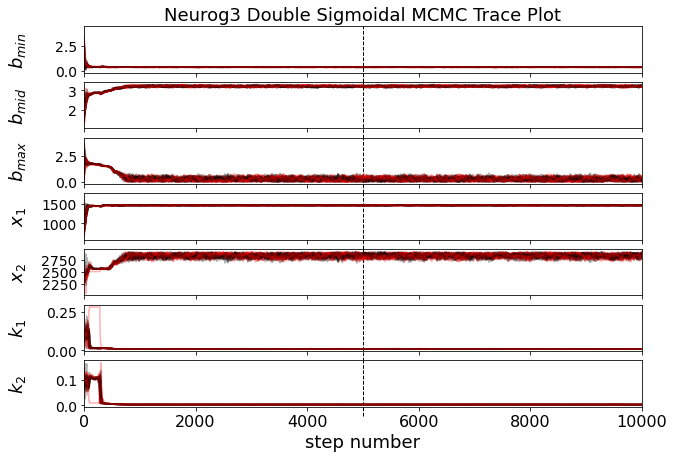

In [11]:
fig = make_mcmc_trace_plot(mcmc,gene,mcmc.best_fits[gene],sub_in_red=True)

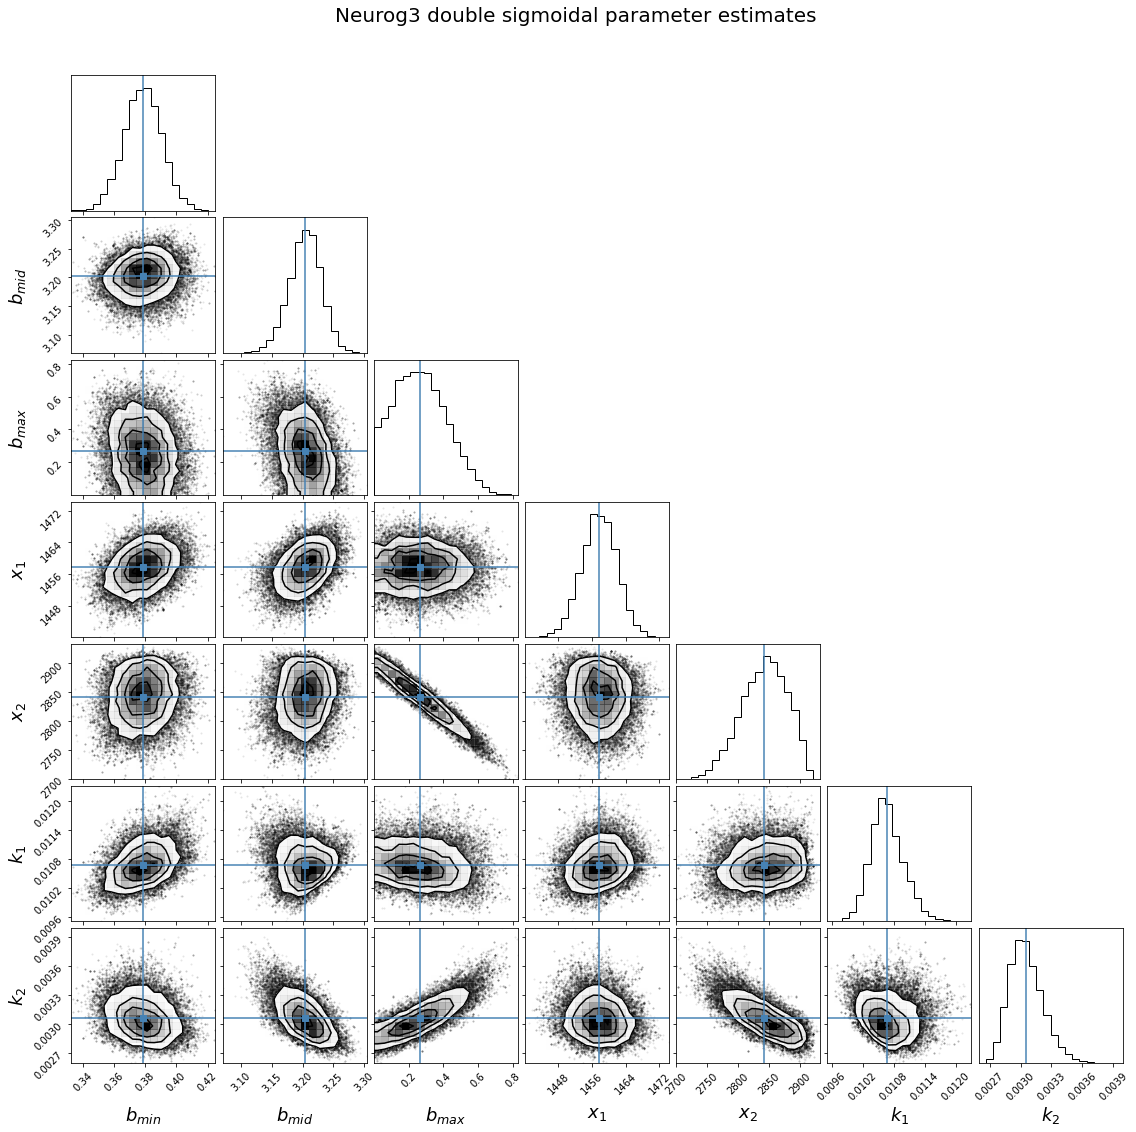

In [12]:
fig = make_corner_plot(mcmc,gene,mcmc.best_fits[gene],n_discard=5000,use_max_args=True)
plt.show()

In [13]:
human_tfs = [x.strip("\n") for x in open('/project/elkabetz_lab/Daniel/Transcriptional_Cascades/data/transcription_factors_lambert_et_al.txt','r').readlines()]
human_tfs_convert = [y[0].upper()+y[1:] for y in [x.lower() for x in human_tfs]]

In [14]:
tfs_full = list(set(mcmc.tfs).union(set(human_tfs_convert)))
mcmc.tfs = tfs_full

In [15]:
len([x for x in mcmc.best_fits.items() if x[1] != 'uniform']),len(mcmc.best_fits)

(3128, 12554)

In [16]:
len([x for x in mcmc.best_fits.items() if x[1] != 'uniform' and x[0] in mcmc.tfs]),len([x for x in mcmc.best_fits if x in mcmc.tfs])

(188, 827)

In [17]:
#get best fitting genes
mcmc.get_top_genes(n_top=1000,sub_tf=True)

In [18]:
len(mcmc.genes_good_fit)

188

Text(0.5, 1.0, 'Transcriptional cascade e14.5 pancreas beta development')

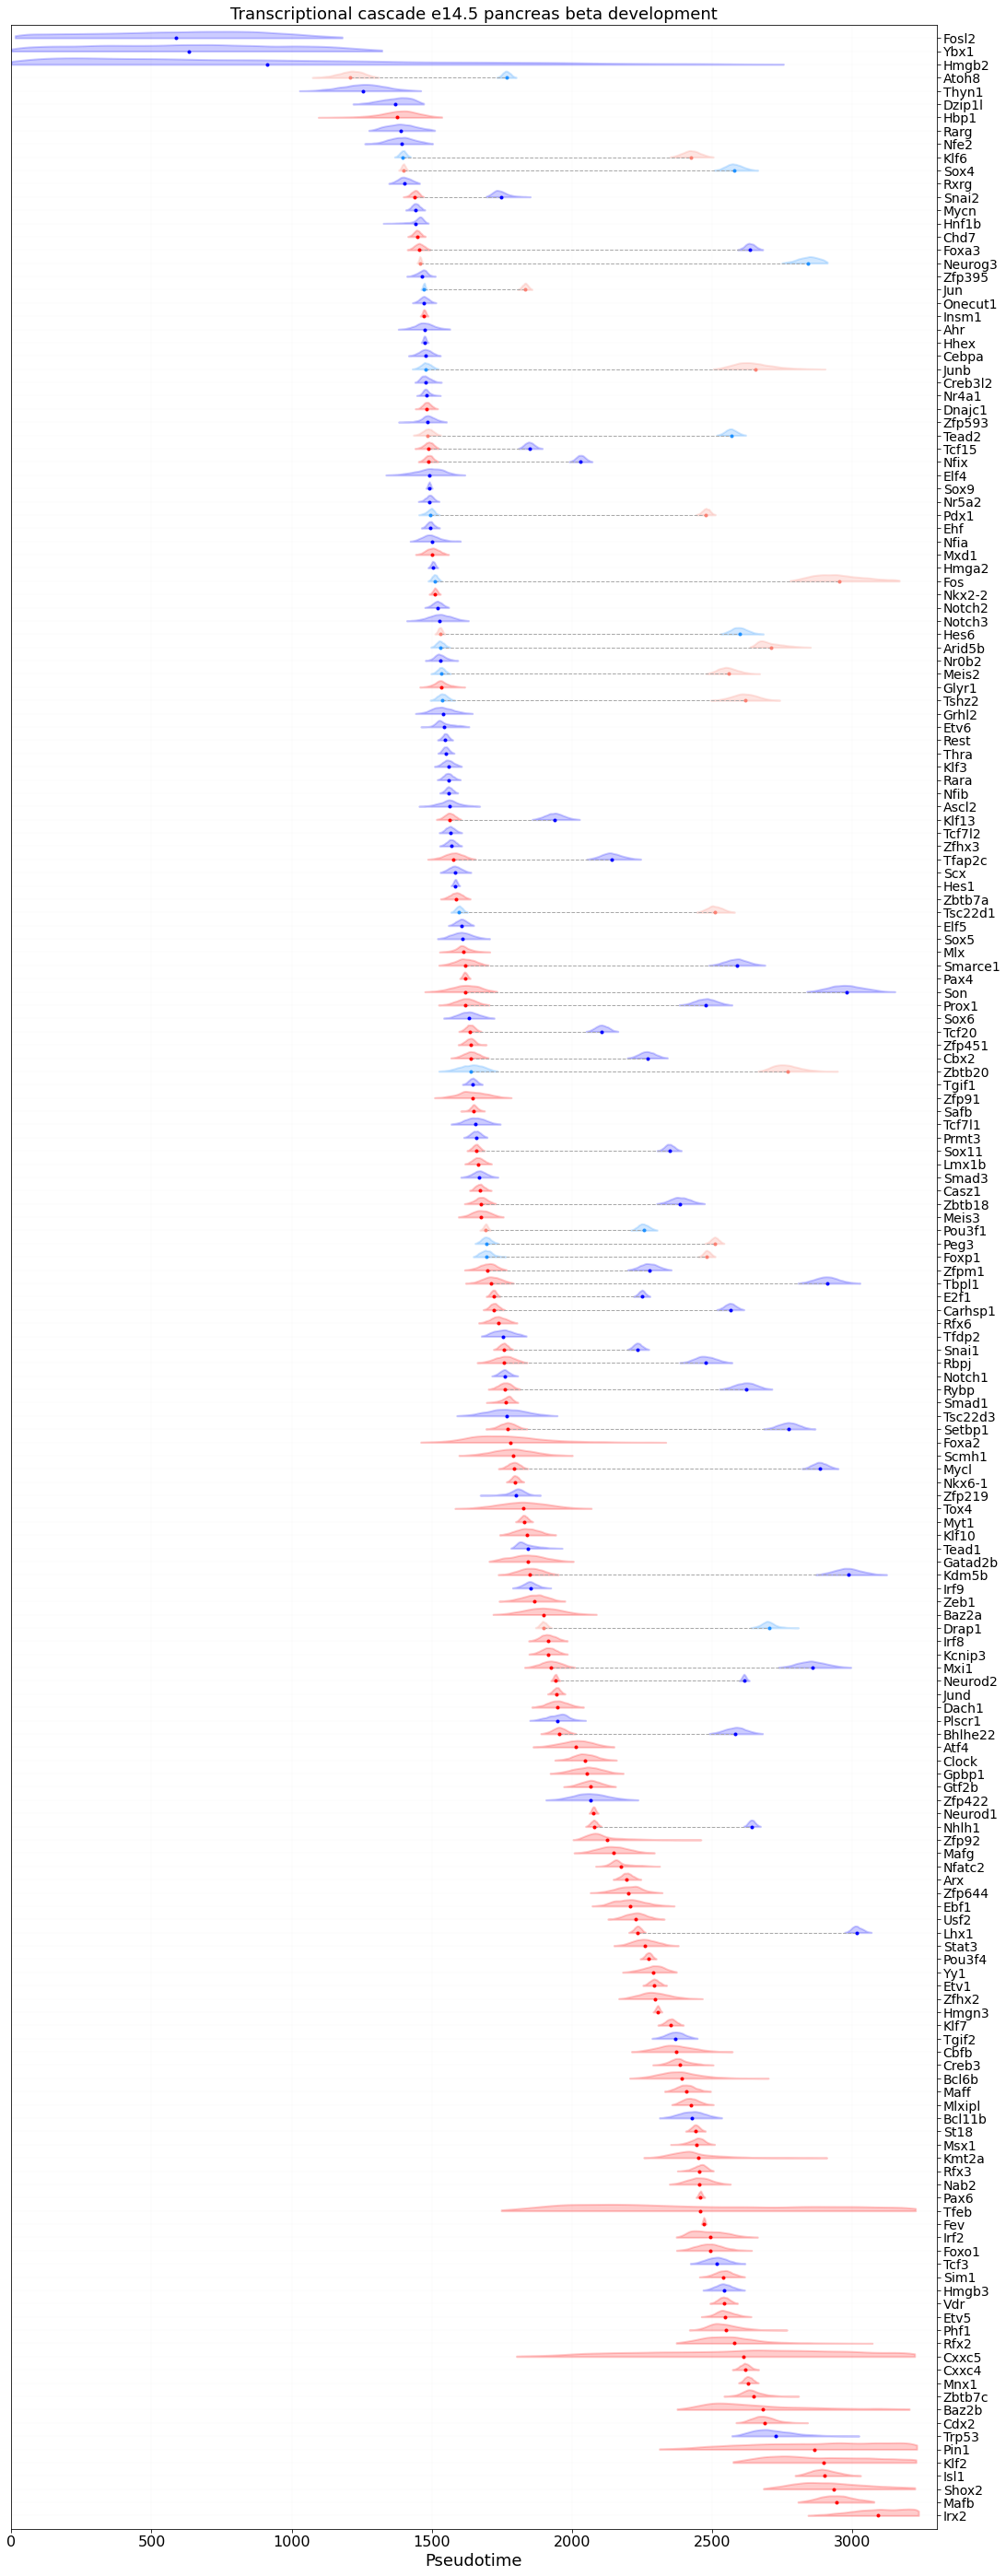

In [19]:
fig = plot_transcriptional_cascade(mcmc,title=None, figsize=(18,50), tfs=mcmc.genes_good_fit,xlim=(0,3300))
ax = plt.gca()
plt.ylim(-len(mcmc.genes_good_fit),1)
plt.title('Transcriptional cascade e14.5 pancreas beta development',fontsize=18)

In [20]:
autocorrelations = {}
iter_ = 0
for j,pkl_fn in enumerate(os.listdir(mcmc.pkl_dir)):
    if 'autocorrelation' not in pkl_fn: continue
    iter_ += 1
    gene = pkl_fn.split(".auto")[0]
    if iter_%100 == 0: print(iter_, gene)
    autocorrelations[gene] = pkl.load(open(mcmc.pkl_dir+pkl_fn,'rb'))

100 B9d1
200 1110035H17Rik
300 Nin
400 Mpp2
500 Smarcd2
600 Zfp598
700 Ybx1
800 Tmem38b
900 Fh1
1000 Ddb2
1100 Tsfm
1200 Shroom4
1300 Lancl2
1400 Atat1
1500 Cnn3
1600 Cmip
1700 Apba3
1800 Taf1b
1900 Pigo
2000 Primpol
2100 Tceal1
2200 Glce
2300 Clptm1
2400 Thnsl2
2500 Katna1
2600 Tle6
2700 Cyb5b
2800 Guk1
2900 Katnal1
3000 Eif2b4
3100 Spag4
3200 Cryl1
3300 Acot8
3400 Unc13b
3500 Arl2bp
3600 Ndufa1
3700 Ddx54
3800 Clu
3900 Tsga10
4000 Prss36
4100 Ppp1r15b
4200 Srsf1
4300 Slc35a3
4400 Enpp3
4500 Kif16b
4600 Slc39a14
4700 Akap17b
4800 Tmpo
4900 Tmem194
5000 Dtx3
5100 Dtx1
5200 Fscn1
5300 Fktn
5400 Syf2
5500 Cnppd1
5600 Dync1li1
5700 Nxpe4
5800 Trappc2l
5900 Vapb
6000 Adar
6100 Nop58
6200 Fbxo34
6300 A930019D19Rik
6400 Mynn
6500 Ern1
6600 Mcm6
6700 Mfsd7b
6800 Ikzf3
6900 Mak
7000 Svip
7100 Echs1
7200 Trub2
7300 Znrf1
7400 Ncoa6
7500 mt-Nd4
7600 Map3k14
7700 Ddx24
7800 Mus81
7900 Cldn6
8000 Ap1ar
8100 B230312C02Rik
8200 Sqle
8300 Net1
8400 Apex2
8500 9130401M01Rik
8600 Plaur
8700 Gatad2b
880

In [21]:
len(autocorrelations)

12554

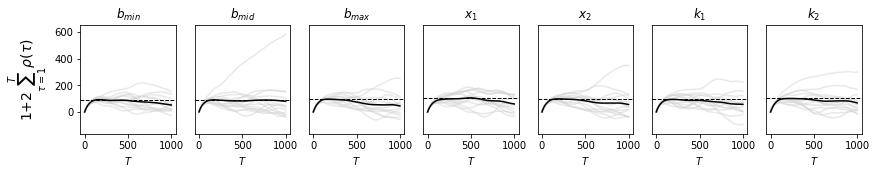

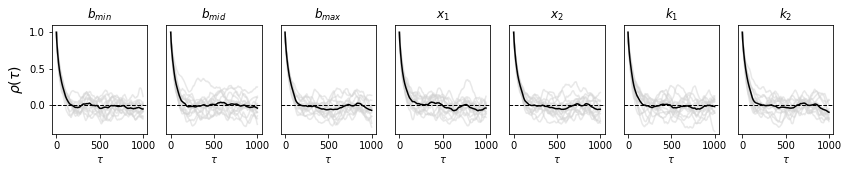

In [22]:
fig = plot_autocorr_time_esimates(mcmc,'Neurog3',autocorrelations)
plt.show()
fig = plot_autocorrelation_func(mcmc,'Neurog3',autocorrelations)
plt.show()

Text(0.5, 1.0, 'Autocorrelation time')

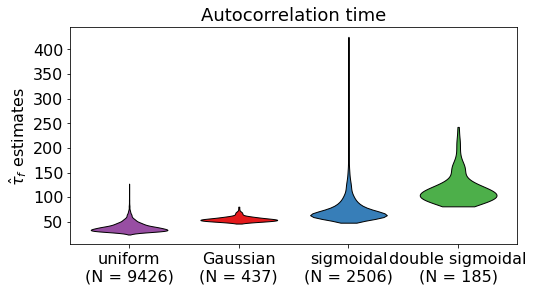

In [23]:
fig = plt.figure(figsize=(8,4))
ax = plt.subplot(111)
clrs = sns.color_palette('Set1', n_colors=10)  # a list of RGB tuples
color_dict = {'gauss':clrs[0],'sigmoidal':clrs[1],'double sigmoidal':clrs[2],'uniform':clrs[3]}
    
colors = sns.color_palette('tab10', n_colors=10)  # a list of RGB tuples
full_vals = []
pos = [0,1,2,3]
types_arg_ = []
types_autocorrtimes = {'uniform':[],'gauss':[],'sigmoidal':[],'double sigmoidal':[]}
types_ = ['uniform','gauss','sigmoidal','double sigmoidal']

for gene in mcmc.best_fits:
    type_ = mcmc.best_fits[gene]
    types_autocorrtimes[type_].append(np.mean(autocorrelations[gene]['autocorr_time_estimates']))

for type_ in types_autocorrtimes:
    full_vals.append(types_autocorrtimes[type_])
    types_arg_.extend([type_]*len(types_autocorrtimes[type_]))

parts = ax.violinplot(full_vals, positions=pos, showmeans=False, showmedians=False,showextrema=False, widths=0.7, bw_method='silverman')
for j,bod in enumerate(parts['bodies']):
    bod.set_color(color_dict[types_[j]])
    bod.set_alpha(1)
    bod.set_edgecolor('black')

#for j,val in enumerate(full_vals):
#    plt.plot([pos[j]]*len(val)+(np.random.rand(len(val))-0.5)/5,val,'o',color='k',markersize=1)
    
plt.xticks(range(len(pos)),[x+'\n(N = '+str(len(types_autocorrtimes[x]))+')' if x != 'gauss' else 
                           'Gaussian\n(N = '+str(len(types_autocorrtimes[x]))+')' for x in types_],fontsize=16)
plt.ylabel(r'$\hat{\tau}_f$ estimates',fontsize=16)
plt.yticks(fontsize=16)
plt.title('Autocorrelation time',fontsize=18)

Inflec 1 overlap:  p=0.273
40000
Inflec 2 overlap:  p<4.00e+04


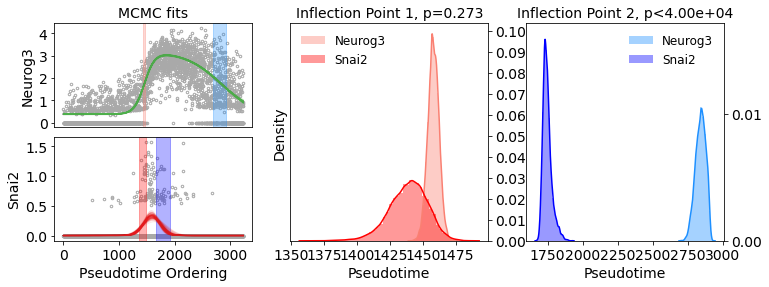

In [24]:
gene1 = 'Neurog3'
gene2 = 'Snai2'
n_discard=5000

fig = make_inflec_point_comp_plot(mcmc,gene1,gene2)